In [52]:
import jax
import jax.numpy as jnp
import optax
import functools
import matplotlib.pyplot as plt

In [53]:
# define constraints that won't change
x0 = 0.2
# can't use float in optax.l2_loss, so convert to array
F0 = jnp.array(10.0)

# define the elasticity as a function of x and params theta (A,B,C)
def k(theta,x):
    return theta[0]*x**2 + theta[1]*x + theta[2]

# define partial derivative of k wrt x, 1 to tell jax to diff wrt to second arg (x)
dk_dx = jax.grad(k,argnums=(1))

In [54]:
# define force
def f(theta,x):
    return k(theta,x)*x + dk_dx(theta,x)*x

# define force at x0, by freezing x as x0
f_at_x0 = functools.partial(f,x=0.20)

In [55]:
# define objetive function for optimizer, jit because called in loop
# Question, Do I need to jit compile the functions called inside loss_function?
@jax.jit
def loss_function(theta):
    f_pred = f_at_x0(theta)
    return optax.l2_loss(F0,f_pred)

In [60]:
# define intial step size for grad descent, did some trial and error before settling for this.
lr = 2e-1
optimizer = optax.adam(lr)
# intialize using a uniform normal distribution.
key = jax.random.key(42)
theta_init = jax.random.uniform(key,(3,))
theta = jnp.array(theta_init)
opt_state = optimizer.init(theta)
N_iter = 1000
# track loss every n_log_loss number of iteration
n_log_loss = 25
loss_hist = []
# iterate
for i in range(N_iter):
    grads = jax.grad(loss_function)(theta)
    updates,opt_state = optimizer.update(grads,opt_state)
    theta = optax.apply_updates(theta,updates)
    if i%25==0:
        loss_hist.append(loss_function(theta))
# params
print(theta)

[19.349806 18.875818 18.835123]


In [61]:
# plug in params to get force
result = f(theta,x0)
result

Array(10.000004, dtype=float32)

Array(0., dtype=float32)

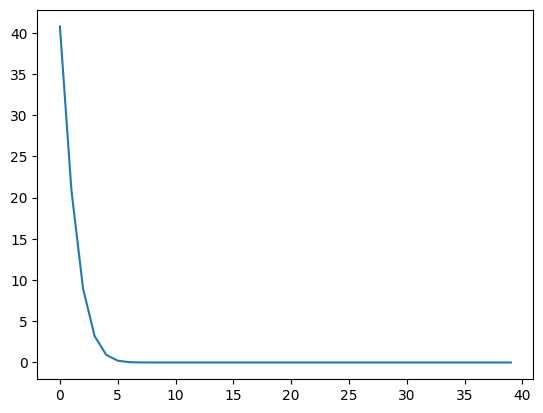

In [58]:
# plot loss history
plt.plot(loss_hist)
loss_hist[-1]

In [59]:
loss_hist

[Array(40.76911, dtype=float32),
 Array(20.875153, dtype=float32),
 Array(8.990267, dtype=float32),
 Array(3.2163308, dtype=float32),
 Array(0.93410546, dtype=float32),
 Array(0.21429126, dtype=float32),
 Array(0.03755739, dtype=float32),
 Array(0.00477806, dtype=float32),
 Array(0.00039972, dtype=float32),
 Array(1.7065702e-05, dtype=float32),
 Array(8.724055e-08, dtype=float32),
 Array(3.5652192e-08, dtype=float32),
 Array(8.411007e-09, dtype=float32),
 Array(3.3151082e-10, dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=float32),
 Array(0., dtype=